In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

key= '32da7524a85e9ffd03bfc4f0135f873b'

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

615

In [6]:
# Get Weather Data using series of API calls/ print log of each city number and name
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 80.55,
        "lat": 73.51
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 33.22,
        "pressure": 1005.65,
        "humidity": 84,
        "temp_min": 33.22,
        "temp_max": 33.22,
        "sea_level": 1005.65,
        "grnd_level": 1005.01
    },
    "wind": {
        "speed": 18.75,
        "deg": 190.747
    },
    "clouds": {
        "all": 50
    },
    "dt": 1561512019,
    "sys": {
        "message": 0.0053,
        "country": "RU",
        "sunrise": 0,
        "sunset": 0
    },
    "timezone": 25200,
    "id": 1507390,
    "name": "Dikson",
    "cod": 200
}


In [7]:
print(requests.get(query_url + city))

<Response [200]>


In [8]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Hermanus
Processing Record 2 | Bonthe
Processing Record 3 | Tasiilaq
Processing Record 4 | Qaanaaq
Processing Record 5 | Codrington
Processing Record 6 | Suluq
Processing Record 7 | Cape Town
Processing Record 8 | Semey
Processing Record 9 | Humaita
Processing Record 10 | Punta Arenas
Processing Record 11 | Foix
Processing Record 12 | Port Moresby
Processing Record 13 | Chimbote
Processing Record 14 | Tuktoyaktuk
Processing Record 15 | Necochea
Processing Record 16 | Rikitea
Processing Record 17 | Hilo
City not found. Skipping...
Processing Record 18 | Cefalu
Processing Record 19 | Mataura
City not found. Skipping...
Processing Record 20 | Ushuaia
Processing Record 21 | Busselton
Processing Record 22 | Atuona
Processing Record 23 | Lata
Processing Record 24 | Quelimane
Processing Record 25 | Horsham
Processing Record 26 | Kapaa
Processing Record 27 | Bredasdorp
Processing Record 2

Processing Record 232 | Caravelas
Processing Record 233 | Ahuimanu
Processing Record 234 | Skagen
Processing Record 235 | Tecoanapa
Processing Record 236 | Chambersburg
Processing Record 237 | Olimpia
Processing Record 238 | Banda Aceh
Processing Record 239 | Leningradskiy
Processing Record 240 | Superior
City not found. Skipping...
Processing Record 241 | Mayo
Processing Record 242 | Nkpor
Processing Record 243 | Baglan
Processing Record 244 | Quatre Cocos
Processing Record 245 | Upernavik
City not found. Skipping...
Processing Record 246 | Port Macquarie
City not found. Skipping...
Processing Record 247 | Christchurch
Processing Record 248 | Nouakchott
Processing Record 249 | Tyazhinskiy
Processing Record 250 | Half Moon Bay
Processing Record 251 | Longyearbyen
Processing Record 252 | Avarua
Processing Record 253 | Poum
Processing Record 254 | Atherton
Processing Record 255 | Kavaratti
Processing Record 256 | Hovd
Processing Record 257 | Semnan
Processing Record 258 | Severo-Yeniseys

Processing Record 455 | Vilhena
Processing Record 456 | Kodiak
Processing Record 457 | Zhuzhou
City not found. Skipping...
Processing Record 458 | Tomatlan
Processing Record 459 | Port Blair
Processing Record 460 | Ostersund
Processing Record 461 | Kuusamo
Processing Record 462 | Luwuk
Processing Record 463 | Veere
Processing Record 464 | Dali
Processing Record 465 | Neftcala
Processing Record 466 | Severomorsk
Processing Record 467 | Conceicao do Araguaia
Processing Record 468 | Kysyl-Syr
Processing Record 469 | Dunedin
Processing Record 470 | Tabou
City not found. Skipping...
Processing Record 471 | Kasongo-Lunda
Processing Record 472 | Moose Factory
Processing Record 473 | Ponta Delgada
Processing Record 474 | Finschhafen
Processing Record 475 | Waingapu
Processing Record 476 | Megion
Processing Record 477 | Adre
Processing Record 478 | Pulivendla
Processing Record 479 | Santa Cruz Cabralia
City not found. Skipping...
Processing Record 480 | Gao
Processing Record 481 | Irituia
Proce

In [9]:
#Create data frame dictionary from our data retrieval
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               560
Country            560
Date               560
Latitude           560
Longitude          560
Max Temperature    560
Humidity           560
Cloudiness         560
Wind Speed         560
dtype: int64

In [10]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,1561512164,-34.42,19.24,57.99,87,61,5.99
1,Bonthe,SL,1561512165,7.53,-12.50,78.04,90,32,5.03
2,Tasiilaq,GL,1561512165,65.61,-37.64,41.00,80,5,8.05
3,Qaanaaq,GL,1561512165,77.48,-69.36,35.38,78,86,4.74
4,Codrington,AU,1561512165,-28.95,153.24,62.60,82,75,9.17


In [14]:
# Export & Save Data Into a .csv.
weather_data.to_csv("weather_data.csv")

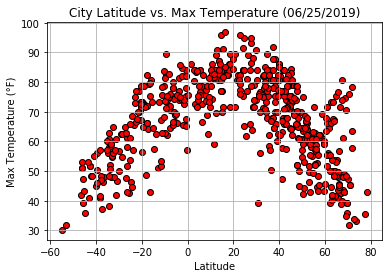

In [18]:
# Build Scatter Plot for Latitude vs. Max Temperature
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (06/25/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

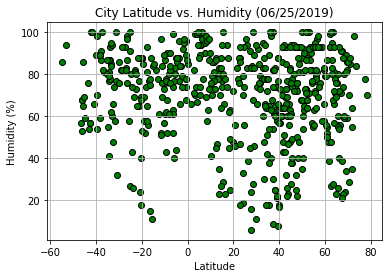

In [19]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (06/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

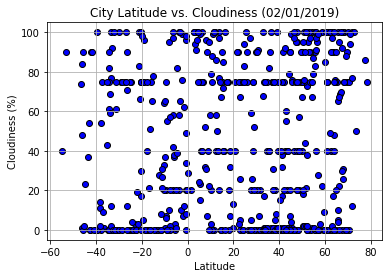

In [21]:
# Build Scatter Plot for Latitude vs. Cloudiness with a chance of meatballs
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

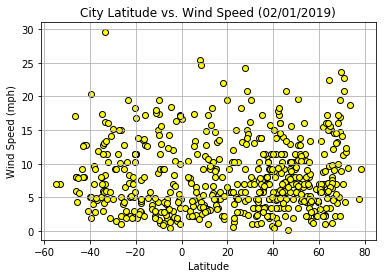

In [22]:
# Build Scatter Plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()